In [3]:
import torch
import torch.nn as nn 
import torch.optim as optim

In [4]:
def f(x, params):
    a,b,c = params
    return a * (x ** 2) + b * x + c

In [22]:
x_0.grad

tensor(2., dtype=torch.float64)

In [27]:
lr = 1e-3

In [63]:
grads=[]
x_0 = torch.tensor(0, dtype=float, requires_grad=True)
params = torch.tensor([1,2,3], dtype=float, requires_grad=False)

loss = f(x_0, params)
loss.backward()

with torch.no_grad():
    
    x_0 -= x_0.grad * lr

x_0.grad.zero_()

tensor(2., dtype=torch.float64)


tensor(0., dtype=torch.float64)

0.0

In [99]:
grads=[]
x_0 = torch.tensor(0, dtype=float, requires_grad=True)
params = torch.tensor([1,2,3], dtype=float, requires_grad=False)

optimizer = optim.SGD([x_0], lr = lr)
for i in range(10000):
    loss = f(x_0, params)
    loss.backward()
    
    optimizer.step()
    grads.append(float(x_0.grad.data.numpy()))
    optimizer.zero_grad()

    

    x_0.grad.zero_()

    

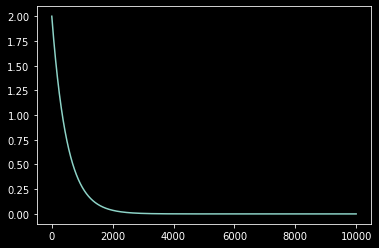

In [100]:
import matplotlib.pyplot as plt

plt.plot(grads)

In [103]:
import numpy as np

In [112]:
class TorchPlayer:
    def __init__(self, 
            id: int,
            D_target: list, 
            G_res: list, 
            a: float,
            b: float,
            d: float,
            a_tilde: float, 
            b_tilde: float,
            D_min: float, 
            D_max: float,
            G_min: float,
            G_max: float,
            risk_aversion: float,
            kappa: list, 
            trading_cost: list,
            connections: list,
            probabilities: list,
            ) -> None:

        self.id = id #Simply a serial number of the agent assigned on the first initialization

        self.D_target = D_target
        self.G_res = G_res
        self.a = a
        self.b = b
        self.d = d
        self.a_tilde = a_tilde
        self.b_tilde = b_tilde
        self.D_min = D_min
        self.D_max = D_max
        self.G_min = G_min
        self.G_max = G_max
        self.risk_aversion = risk_aversion
        self.probabilities = probabilities

        self.probabilities_ind = [i for i in range(len(self.probabilities))]


        self.trading_cost = trading_cost
        self.connections = connections

        self.kappa = np.ma.MaskedArray(kappa, 
                                        mask = np.logical_not(self.connections), 
                                        fill_value = 0).filled()

        self.G = torch.zeros(len(self.probabilities_ind), requires_grad=True)

        
class Functions:
    
    @staticmethod
    def utility_generation(agent: TorchPlayer) -> np.ndarray:

        return [0.5 * agent.a * agent.G[proba] ** 2 
                        + agent.b * agent.G[proba] 
                        + agent.d for proba in agent.probabilities_ind]

In [113]:
agent_1 = TorchPlayer(0, [1], [1], 1, 1, 1, 1, 1, 1, 2, 0 ,5, 0.5, [1,2,3], [0,1,1], [0,1,1], [0.5])

In [114]:
Functions.utility_generation(agent_1)

[tensor(1., grad_fn=<AddBackward0>)]

In [116]:
loss = Functions.utility_generation(agent_1)

grads=[]

optimizer = optim.SGD([agent_1.G], lr = lr)

for i in range(10000):
    for proba in agent_1.probabilities_ind:
        loss = Functions.utility_generation(agent_1)[proba]
        loss.backward()
        
        optimizer.step()
        grads.append(float(agent_1.G.grad.data.numpy()))
        optimizer.zero_grad()

    

        x_0.grad.zero_()


In [111]:
agent_1.G

tensor([0.], requires_grad=True)

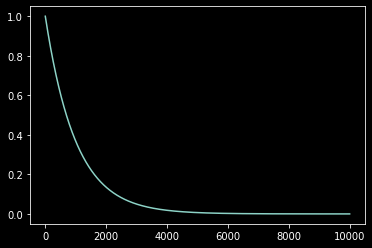

In [117]:
plt.plot(grads)

In [126]:
class Class1:
    def __init__(self, a):
        self.a = a

    def update(self):
        self.a += 5
        return self.a 

class Class2(Class1):
    def __init__(self, a, b):
        super().__init__(a)
        self.b = b
    
    def update(self):
        return self.a + self.b

In [124]:
c1 = Class1(5)
c2 = Class2(5)

In [125]:
c1.update()

10